<a href="https://colab.research.google.com/github/ArfaKhalid/Deep-Learning-with-Keras-Sentiment-Analysis-of-Reviews/blob/main/Deep_learning_with_Keras_Sentiment_Analysis_of_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning with Keras - Sentiment Analysis of Reviews
Build a Neural Network - Analyze text for sentiment using in built IMDB. The IMDB dataset contains 50,000 movie reviews that have been individually scored as positive (1) or negative (0). The dataset is divided into 25,000 reviews for training and 25,000 reviews for testing.

In [1]:
# Load dataset
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

# About data
- The variable named x_train is a list of 25,000 lists, each of which represents one movie review.
- x_test is also a list of 25,000 lists representing 25,000 reviews.
- x_train will be used for training, while x_test will be used for testing. But the inner lists — the ones representing movie reviews — don't contain words; they contain integers.
- The reason the inner lists contain numbers rather than text is that you don't train a neural network with text; you train it with numbers.


In [2]:
# the integers representing the first review in the training set
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

# Dictionary mapping words to integers in this dataset

In [3]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

# The first review in x_train in textual format (reverse encoding)

In [4]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Train a neural network with collection of tensors, each tensor needs to be the same length
Keras includes a function that takes a list of lists as input and converts the inner lists to a specified length by truncating them if necessary or padding them with 0s.

In [5]:
#force all the lists representing movie reviews in x_train and x_test to a length of 500 integers
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# Model Building : Neural Network to perform sentiment Analysis

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 16)                256016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 576305 (2.20 MB)
Trainable params: 576305 (2.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Model Structure
1. Sequential Model Creation:
- Instantiates a Sequential object representing a model with a stacked structure.
- Layers are arranged sequentially, where the output of one layer feeds into the next.
2. Layer Addition:
- Several statements add layers to the model.
3. Embedding Layer Introduction:
- The first added layer is an embedding layer.
- Crucial for word-processing neural networks.
4. Function of Embedding Layer:
- Maps arrays with word indexes to arrays with fewer dimensions.
- Treats words with similar meanings similarly.



## Dense Layers in a Neural Network
- Dense Layers Overview:
Dense layers are traditional, fully connected layers in neural networks.
- Connection Pattern:
Neurons in each layer connect to every neuron in the previous layer.
- Learning Process:
Enable the network to "learn" from input data through iterative guessing, result checking, and fine-tuning connections.
- Neuron Count:
The first two dense layers have 16 neurons each (arbitrary choice for experimentation). Experimenting with different sizes might improve model accuracy.
- Final Layer Configuration:
The final dense layer contains only one neuron. Its purpose is to predict a sentiment score ranging from 0.0 to 1.0, aligning with the ultimate goal of the network.


# Neural Network Model Breakdown









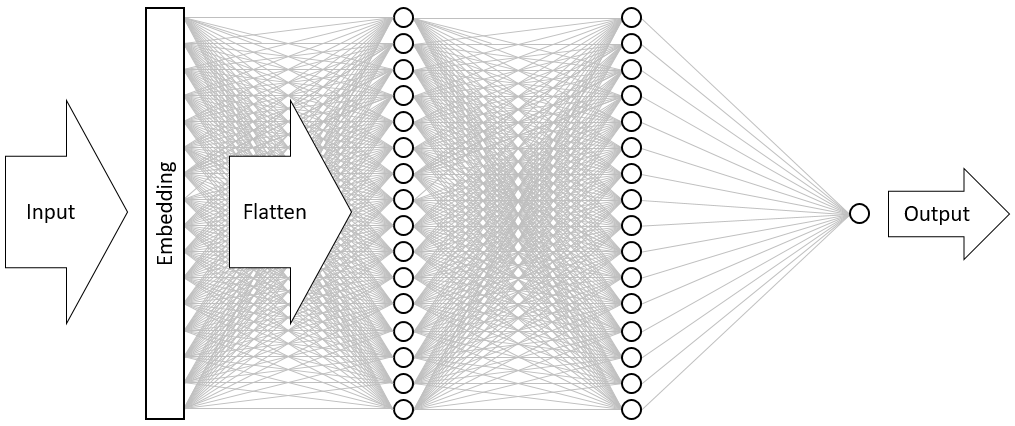

# Training the Model- Model fit
The compile function "compiles" the model by specifying important parameters such as which optimizer to use and what metrics to use to judge the accuracy of the model in each training step. Training doesn't begin until you call the model's fit function, so the compile call typically executes quickly.



In [7]:
#  fit function to train the neural network
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
196/196 [==============================] - 11s 44ms/step - loss: 0.4944 - accuracy: 0.7322 - val_loss: 0.2915 - val_accuracy: 0.8768
Epoch 2/5
196/196 [==============================] - 6s 31ms/step - loss: 0.1741 - accuracy: 0.9374 - val_loss: 0.3039 - val_accuracy: 0.8751
Epoch 3/5
196/196 [==============================] - 8s 41ms/step - loss: 0.0531 - accuracy: 0.9868 - val_loss: 0.3675 - val_accuracy: 0.8717
Epoch 4/5
196/196 [==============================] - 6s 31ms/step - loss: 0.0109 - accuracy: 0.9988 - val_loss: 0.4387 - val_accuracy: 0.8686
Epoch 5/5
196/196 [==============================] - 8s 41ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.4700 - val_accuracy: 0.8697


## Training Process Overview
1. **Training Duration:**
- Training is expected to take approximately 6 minutes.
- About 1 minute per epoch, where an epoch is one complete pass through the entire dataset.
2. **Epochs in Training:**
- epochs=5 instructs Keras to perform 5 forward and backward passes through the model during training.
- Each epoch involves learning from the training data and validating against the test data.
3. **Adjustments and Learning:**
- After each pass or epoch, the model makes adjustments based on the training data and validates against the test data.
4. **Output from fit Function:**
- The fit function output displays training accuracy (acc) and validation accuracy (val_acc) for each epoch.
- These metrics indicate how well the model is learning during training and how well it generalizes on the validation data.
5. **Batch Size Explanation:**
- batch_size=128 indicates that Keras uses 128 training samples at a time to train the network.
- Larger batch sizes speed up training time but may affect accuracy.
- Smaller batch sizes might enhance accuracy but can extend training time.
## Model Learning Characteristics:

1. **Swift Learning with Few Epochs:**
Unusually, this model effectively learns with only a few epochs.
2. **Rapid Training Accuracy:**
Training accuracy quickly reaches close to 100%.
3. **Validation Accuracy Trend:**
Validation accuracy rises for the initial epochs and then plateaus.
4. **Optimal Training Duration:**
It's advisable not to extend training beyond the point where accuracies stabilize.
5. **Risk of Overfitting:**
Prolonged training may lead to overfitting. Overfitting results in good performance on test data but less effectiveness with real-world data.
6. **Signs of Overfitting:**
One indicator is a growing gap between training accuracy and validation accuracy.

[]

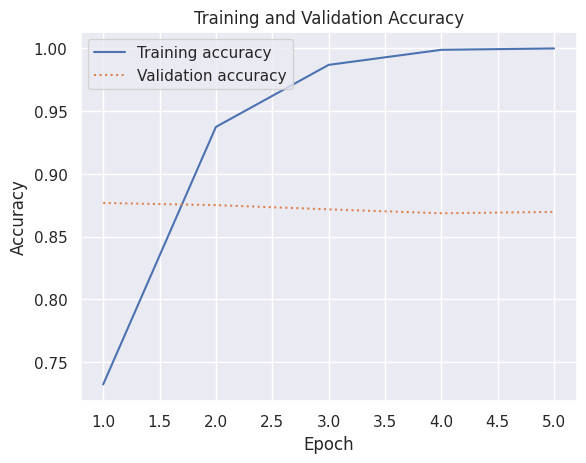

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

As validation accuracy leveled off after only 2 epochs, we can tell that we need fewer than 5 to get our best (and least overfit) result.


**Checking for Overfitting:**

1. **Loss Comparison:**
   - Compare training loss to validation loss during training to detect overfitting.

2. **Minimizing Loss Function:**
   - Optimization problems aim to minimize a loss function.

3. **Overfitting Indicator:**
   - Training loss significantly greater than validation loss for a given epoch can signal overfitting.

4. **Loss Values in History Object:**
   - The `history` object contains 'loss' and 'val_loss' values for training and validation loss.

5. **Code Modification for Loss Plot:**
   - Use 'loss' and 'val_loss' instead of 'acc' and 'val_acc' to plot training and validation loss.

6. **Understanding the Chart:**
   - Increasing gap between training and validation loss, especially after the third epoch, may indicate overfitting.

7. **Epoch Adjustment Suggestion:**
   - If overfitting is observed, consider adjusting the number of epochs.
   - However, increasing epochs beyond a certain point might exacerbate overfitting rather than improving the model.

[]

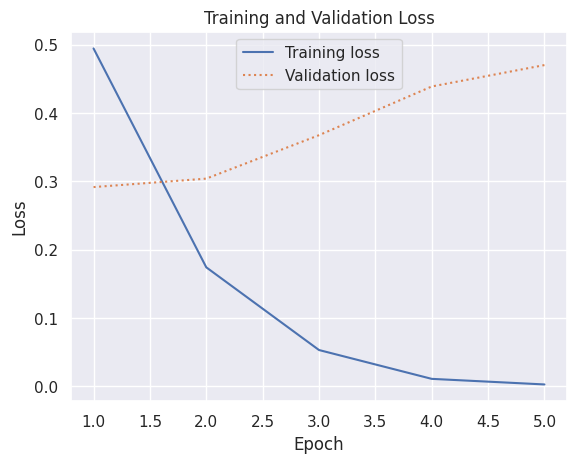

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper center')
plt.plot()

# Evaluate Model

In [10]:
# Evaluate Model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 86.97%


# Use the Neural Network to Analyze Text for Sentiment
A function that accepts a text string as input, passes it to the model, and returns a sentiment score. This function is then use to analyze the sentiment expressed in various text strings.

In [11]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

**Analyzing Sentiment Function:**

1. **Function Definition:**
   - The provided statements define a function named `analyze`.

2. **Input and Output:**
   - `analyze` function takes a string as input.
   - It returns a numerical value ranging from 0.0 to 1.0, indicating the expressed sentiment.
     - Higher values denote more positive sentiment.

3. **Text Cleaning:**
   - The function preprocesses the input string by cleaning it.

4. **Conversion to Integer List:**
   - Converts the cleaned string into a list of integers.
   - The integers reference words in a dictionary created by the `load_data` function.

5. **Model Prediction:**
   - Utilizes the model's `predict` function to score the sentiment of the text.
   - The result is a numeric representation of the sentiment, with higher scores indicating a more positive sentiment.

In [12]:
analyze('Easily the most stellar experience I have ever had.')

1/1 [==============================] - 0s 102ms/step


0.9313244

It shows the positive review.

In [13]:
analyze('The long lines and poor customer service really turned me off.')

1/1 [==============================] - 0s 20ms/step


0.15121315

It shows the negative review.

In [14]:
analyze('This provides me comfort and let me beleive in the world')

1/1 [==============================] - 0s 24ms/step


0.96858567

In [15]:
analyze('They could have used better plot yet cast were good in it')

1/1 [==============================] - 0s 22ms/step


0.30463588

# Sentiment Analysis Results:
**Testing Model with Custom Input:**

1. **Expected Results:**
   - The results might not be flawless, but the model showcase reasonable proficiency in quantifying sentiment.

2. **Versatility of the Model:**
   - The model's applicability extends beyond movie reviews.
   - It is capable of analyzing sentiment across various subjects, demonstrating its adaptability to diverse language expressions.

3. **Rationale:**
   - It shows the versatility by highlighting inherent similarities between language conveying opinions about movies and language expressing sentiments on unrelated topics.

4. **Effectiveness:**
   - Experimentation with the model's performance on different inputs proves its adaptability and effectiveness in sentiment analysis.
